In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
from netCDF4 import Dataset

%matplotlib inline

In [48]:
# era_AREA = area_grid_cell(lat, 0.375, 0.375)

In [49]:
nc_path   = '//uio/lagringshotell/geofag/students/metos/hannasv/satelite_coordinates/'
nc_file  = glob.glob(nc_path + '*.nc')[0]
rootgrp = Dataset(nc_file, "r", format="NETCDF4")
cloud_mask = rootgrp.variables["cloudMask"][:].data
lat_array = rootgrp.variables["lat"][:].data
lon_array = rootgrp.variables["lon"][:].data
lat_array[lat_array < -99] = np.nan # updates of disk values to nan
lon_array[lon_array < -99] = np.nan # updates of disk values to nan
d_phi   = lon_array[:, 1:] - lon_array[:, :-1]
d_theta = lat_array[1:, :] - lat_array[:-1, :]

# Padding the axis -- we removed by taking the difference
pad     = np.ones((3712, 1))*np.nan # adding numpy to the axis the values
d_phi   = np.concatenate((pad, d_phi), axis = 1)/2
d_theta = np.concatenate((pad.transpose(), d_theta), axis = 0)/2

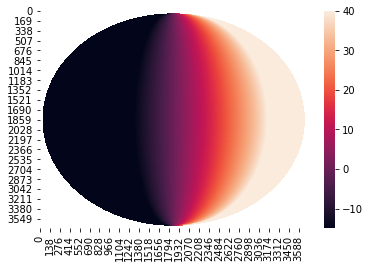

In [50]:
sns.heatmap(lon_array, vmin = -15, vmax = 40)

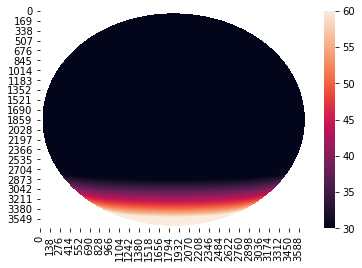

In [18]:
sns.heatmap(lat_array, vmin = 30, vmax = 60)

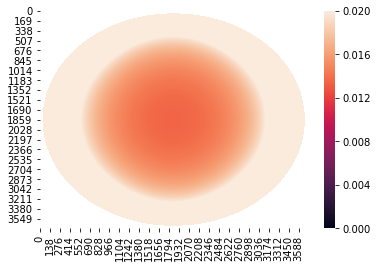

In [6]:
sns.heatmap(d_phi, vmin = 0, vmax = 0.02)

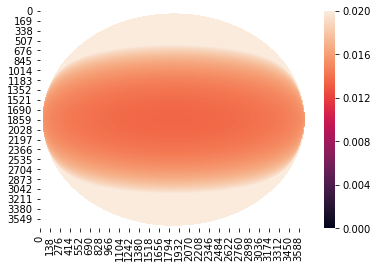

In [7]:
sns.heatmap(d_theta, vmin = 0, vmax = 0.02)

In [8]:
Lo = np.fliplr(lon_array)
LA = np.flipud(lat_array)

d_phi_FLIP   = Lo[:, 1:] - Lo[:, :-1]
d_theta_FLIP = LA[1:, :] - LA[:-1, :]

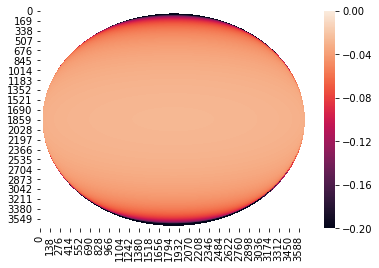

In [14]:
sns.heatmap(d_theta_FLIP, vmin = -0.2, vmax = 0)

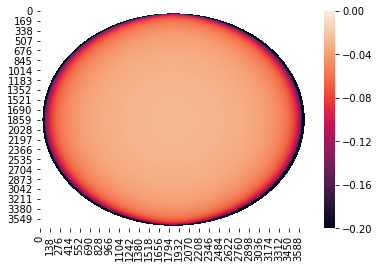

In [16]:
sns.heatmap(d_phi_FLIP, vmin = -0.2, vmax = 0)

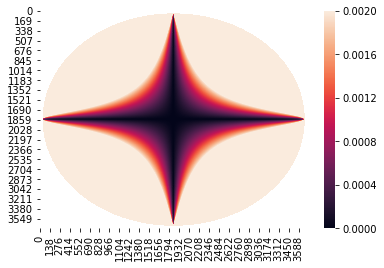

In [112]:
sns.heatmap(d_theta_new2*10, vmin = 0, vmax = 0.02)

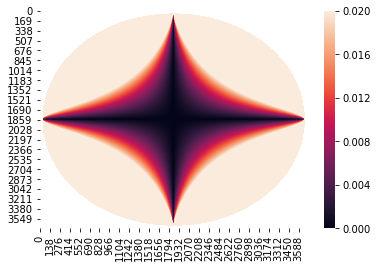

In [113]:
sns.heatmap(d_phi_new2*10, vmin = 0, vmax = 0.02)

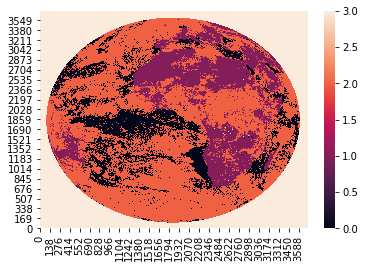

In [67]:
ax = sns.heatmap(cloud_mask)
ax.invert_yaxis()

In [9]:
lat_array[idx-50:idx+10, idx-50:idx+10]

array([[-1.3299443 , -1.3299412 , -1.3299382 , ..., -1.3298684 ,
        -1.3298689 , -1.3298694 ],
       [-1.302795  , -1.3027921 , -1.3027891 , ..., -1.3027208 ,
        -1.3027213 , -1.3027217 ],
       [-1.2756463 , -1.2756433 , -1.2756405 , ..., -1.2755736 ,
        -1.2755741 , -1.2755746 ],
       ...,
       [ 0.21710388,  0.21710338,  0.2171029 , ...,  0.21709152,
         0.21709159,  0.21709168],
       [ 0.24424212,  0.24424155,  0.244241  , ...,  0.2442282 ,
         0.24422829,  0.24422838],
       [ 0.27138042,  0.2713798 ,  0.2713792 , ...,  0.27136496,
         0.27136508,  0.27136517]], dtype=float32)

In [16]:
#sns.heatmap(subset_lat)

In [15]:
#sns.heatmap(subset_lon)

In [14]:
#subset_lat, subset_lon

In [19]:
d_phi_new = np.zeros((100,100))
d_theta_new = np.zeros((100,100))

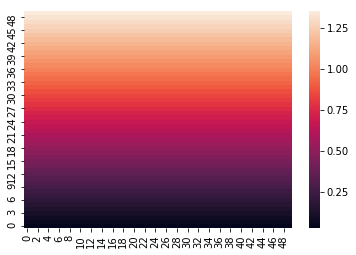

In [28]:
ax = sns.heatmap(lat_array[idx:idx+50, idx:idx+50])
ax.invert_yaxis()

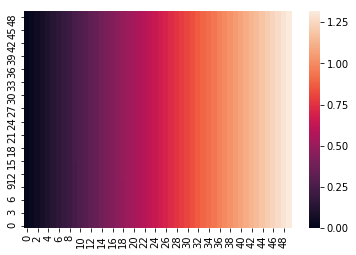

In [29]:
ax = sns.heatmap(lon_array[idx:idx+50, idx:idx+50])
ax.invert_yaxis()

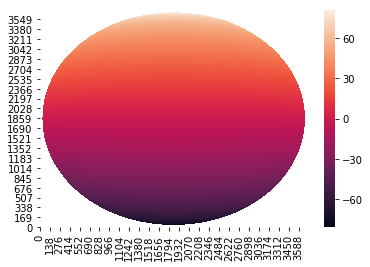

In [31]:
ax = sns.heatmap(lat_array)
ax.invert_yaxis()

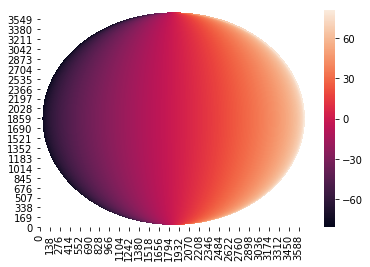

In [32]:
ax = sns.heatmap(lon_array)
ax.invert_yaxis()

In [37]:
idx        = int(3712/3*2)
subset_lat = lat_array[idx:idx+100, idx:idx+100]
subset_lon = lon_array[idx:idx+100, idx:idx+100]

for i in range(1, 99):
    for j in range(1, 99):
        #print("lon {}, lon +1 {}, lon-1 {}".format(subset_lon[i, j], subset_lon[i+1, j], subset_lon[i-1, j]))
        left_half_dist    = (subset_lon[i, j] - subset_lon[i+1, j])/2
        right_half_dist   = (subset_lon[i-1, j] - subset_lon[i, j])/2
        d_phi_new[i][j]   = (left_half_dist + right_half_dist)/2
        #print("lat {}, lat +1 {}, lat-1 {}".format(subset_lat[i, j], subset_lat[i, j+1], subset_lat[i, j-1]))
        upper_half_dist   = (subset_lat[i,j+1] - subset_lat[i,j])/2
        lower_half_dist   = (subset_lat[i,j] - subset_lat[i,j-1])/2
        d_theta_new[i][j] = (upper_half_dist + lower_half_dist)/2

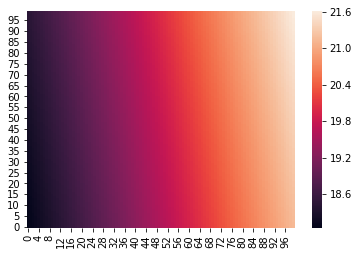

In [43]:
ax = sns.heatmap(subset_lon)
ax.invert_yaxis()

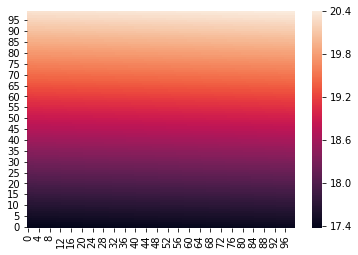

In [41]:
ax = sns.heatmap(subset_lat)
ax.invert_yaxis()

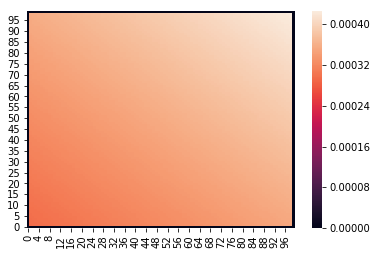

In [42]:
ax = sns.heatmap(d_theta_new)
ax.invert_yaxis()

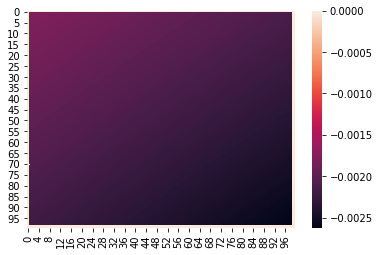

In [39]:
sns.heatmap(d_phi_new)

In [51]:
def compute_dDegrees(lat, lon):

    d_phi_new2   = np.nan*np.zeros(np.shape(lat))
    d_theta_new2 = np.nan*np.zeros(np.shape(lat))
    cell_areas   = np.nan*np.zeros(np.shape(lat))
    
    for i in range(1, len(lat)-1):
        for j in range(1, len(lat)-1):
            left_half_dist     = (lon[i, j] - lon[i+1, j])/2
            right_half_dist    = (lon[i-1, j] - lon[i, j])/2
            #print("left_half_dist {}, right _half_dist {}".format(left_half_dist, right_half_dist))
            dlon = (np.abs(left_half_dist) + np.abs(right_half_dist))/2
            d_phi_new2[i][j]   = dlon

            upper_half_dist    = (lat[i,j+1] - lat[i, j])/2
            lower_half_dist    = (lat[i, j] - lat[i, j-1])/2
            #print("upper_half_dist {}, lower_half_dist {}".format(upper_half_dist, lower_half_dist))
            dlat = (np.abs(upper_half_dist) + np.abs(lower_half_dist))/2
            d_theta_new2[i][j] = dlat
            
            cell_areas[i][j] = area_grid_cell(lat[i, j], dlat, dlon)       
            
    return d_phi_new2, d_theta_new2, cell_areas

In [52]:
d_phi_new2, d_theta_new2, areas = compute_dDegrees(lat_array, lon_array)

NameError: global name 'area_grid_cell' is not defined

In [85]:
areas[areas > 100] = np.nan

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


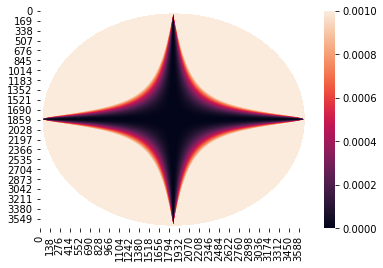

In [94]:
sns.heatmap(areas, vmin = 0, vmax = 0.001)

In [95]:
compute_area_one_cell(lat = 30, lon = -15, c_lat = lat_array.reshape(-1), 
                      c_lon = lon_array.reshape(-1), d_theta = d_theta_new2.reshape(-1), 
                      d_phi = d_phi_new2.reshape(-1), cloud_mask_array = cloud_mask.reshape(-1)  )


/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greater
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value enc

ValueError: No corners found, something is wrong ... 

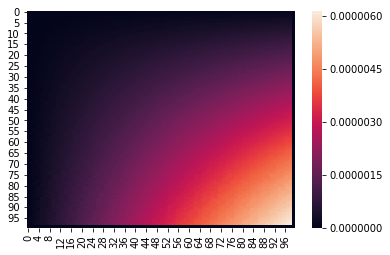

In [39]:
sns.heatmap(d_theta_new2)

In [5]:
np.shape(lat_array)

(3712, 3712)

In [51]:
compute_area_one_cell(lat = 30, lon = -15, c_lat = subset_lat.reshape(-1), 
                      c_lon = subset_lon.reshape(-1), d_theta = d_phi_new.reshape(-1), 
                      d_phi = d_phi_new.reshape(-1), cloud_mask_array = cloud_mask[idx:idx+100, idx:idx+100].reshape(-1))

ValueError: No corners found, something is wrong ... 

In [34]:
945*0.005

4.7250000000000005

In [45]:
sns.heatmap(d_theta_new2)

NameError: name 'd_theta_new2' is not defined

In [55]:
d_phi_new2, d_theta_new2, areas = compute_dDegrees(lat_array, lon_array)

compute_area_one_cell(lat = 30, lon = -15, c_lat = lat_array.reshape(-1), 
                      c_lon = lon_array.reshape(-1), d_theta = d_theta_new2.reshape(-1), 
                      d_phi = d_phi_new2.reshape(-1), cloud_mask_array = cloud_mask.reshape(-1))

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greater
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value enc

930
892
238
234


ValueError: No corners found, something is wrong ... 

In [163]:
min_lon, max_lon, min_lat, max_lat

(-15.375, -14.625, 29.625, 30.375)

In [164]:
era_up, era_down, era_left, era_right

(30.375, 29.625, -15.375, -14.625)

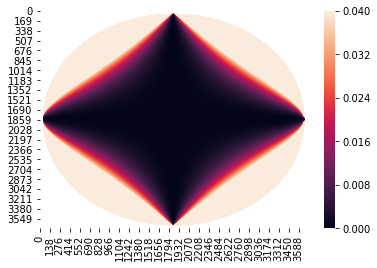

In [204]:
sns.heatmap(areas, vmin = 0, vmax = 0.04)

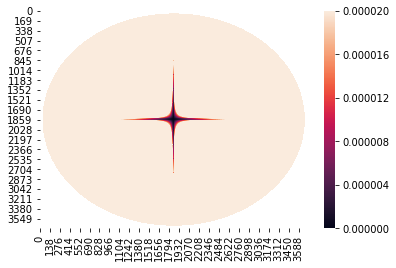

In [205]:
sns.heatmap(d_phi_new2, vmin= 0, vmax = 0.00002)

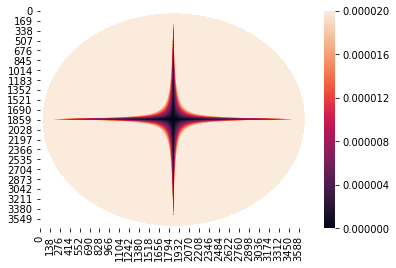

In [206]:
sns.heatmap(d_theta_new2, vmin= 0, vmax = 0.00002)

In [170]:
lat = 30 
lon = -15
c_lat = lat_array.reshape(-1) 
c_lon = lon_array.reshape(-1)
d_theta = d_theta_new2.reshape(-1)
d_phi = d_phi_new2.reshape(-1)
cloud_mask_array = cloud_mask.reshape(-1)

era_AREA = area_grid_cell(lat, 0.375, 0.375)

# Make this a loop over lat_lons?
lat_bondaries = np.array([[lon],
                          [lat]])

BOUND =  np.array([[-0.75/2, 0.75/2],
                   [-0.75/2, 0.75/2]])

ranges = lat_bondaries + BOUND

lon_range = ranges[0, :]
lat_range = ranges[1, :]
min_lon, max_lon = lon_range
min_lat, max_lat = lat_range

#d_phi   = d_phi.reshape(-1)
#d_theta = d_theta.reshape(-1)

era_up    = ranges[1, 1]
era_down  = ranges[1, 0]
era_left  = ranges[0, 0]
era_right = ranges[0, 1]

#c_lon = lon_array.reshape(-1) #+ d_phi
#c_lat = lat_array.reshape(-1) #+ d_theta
#d_phi = np.abs(d_phi)
#d_theta = np.abs(d_theta)

cmk_left  = c_lon - np.abs(d_phi)   #- era_right
cmk_right = c_lon + np.abs(d_phi)   #- era_left

# TODO : Sjekk d theta og lignende.
cmk_up    = c_lat + np.abs(d_theta) #- era_down
cmk_down  = c_lat - np.abs(d_theta) #- era_up


/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in less_equal
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater_equal
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less_equal
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater_equal
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in less_equal
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:4

In [190]:
temp.shape

(3712, 3712)

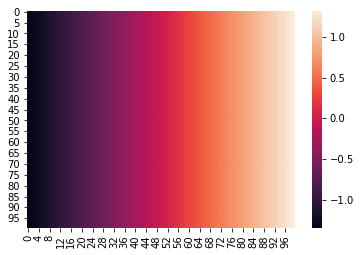

In [192]:
idx = int(3712/2)
temp = cmk_left.reshape(3712, 3712)
sns.heatmap(temp[idx-50:idx+50,idx-50:idx+50])

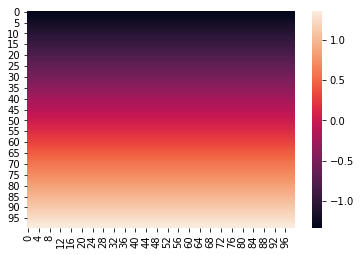

In [193]:
temp = cmk_up.reshape(3712, 3712)
sns.heatmap(temp[idx-50:idx+50,idx-50:idx+50])

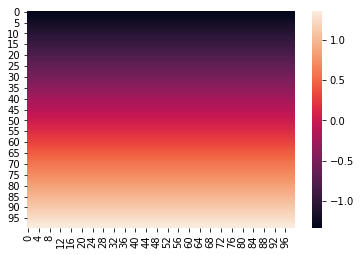

In [194]:
temp = cmk_down.reshape(3712, 3712)
sns.heatmap(temp[idx-50:idx+50, idx-50:idx+50])

In [217]:
len(np.argwhere(cmk_right == cmk_left))

3609

In [215]:
len(np.argwhere(cmk_up == cmk_down))

5597

In [ ]:
idx_left_boundary  = np.intersect1d(np.argwhere(cmk_right >= era_left),  np.argwhere(cmk_left <= era_left) )
idx_right_boundary = np.intersect1d(np.argwhere(cmk_right >= era_right), np.argwhere(cmk_left <= era_right) )
idx_up_boundary    = np.intersect1d(np.argwhere(cmk_up >= era_up),       np.argwhere(cmk_down <= era_up) )
idx_down_boundary  = np.intersect1d(np.argwhere(cmk_up >= era_down),     np.argwhere(cmk_down <= era_down) )

In [171]:
len(idx_up_boundary)

240

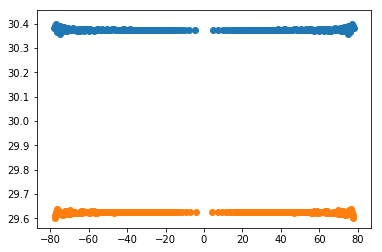

In [180]:
plt.scatter(c_lon[idx_up_boundary],   c_lat[idx_up_boundary])
plt.scatter(c_lon[idx_down_boundary], c_lat[idx_down_boundary])

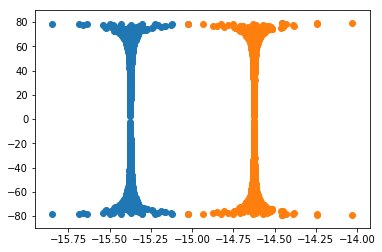

In [182]:
plt.scatter(c_lon[idx_left_boundary], c_lat[idx_left_boundary])
plt.scatter(c_lon[idx_right_boundary], c_lat[idx_right_boundary])

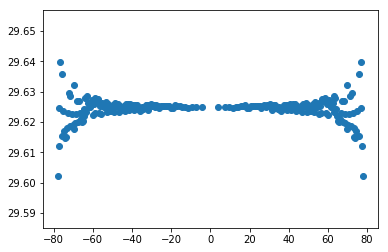

In [169]:
plt.scatter(c_lon[idx_down_boundary], c_lat[idx_down_boundary])

In [173]:
# subsection left boundary OLD
low_bound = np.argwhere( cmk_up[idx_left_boundary] > min_lat  )
up_bound  = np.argwhere( cmk_down[idx_left_boundary] < max_lat  )
sub_section_left = np.intersect1d(low_bound, up_bound)

In [174]:
sub_section_left

array([548, 549, 550, 551])

In [175]:
#  subsection right boundary
low_bound = np.argwhere( cmk_up[idx_right_boundary] > min_lat )
up_bound  = np.argwhere( cmk_down[idx_right_boundary] < max_lat)
sub_section_right = np.intersect1d(low_bound, up_bound)

In [176]:
sub_section_right

array([526, 527, 528])

In [177]:
# subsection left boundary OLD
low_bound = np.argwhere( cmk_right[idx_up_boundary] > min_lon )
up_bound  = np.argwhere( cmk_left[idx_up_boundary] < max_lon  )
sub_section_up = np.intersect1d(low_bound, up_bound)


In [179]:
sub_section_up

array([], dtype=int64)

In [178]:
# subsection left boundary OLD
low_bound = np.argwhere( cmk_right[idx_down_boundary] > min_lon )
up_bound  = np.argwhere( cmk_left[idx_down_boundary] < max_lon  )
sub_section_down = np.intersect1d(low_bound, up_bound)

In [162]:
up_bound.flatten()

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220])

In [161]:
low_bound.flatten()

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 222, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 232, 233])

In [156]:
idx_up_boundary

array([10312235, 10315349, 10315948, 10319060, 10319661, 10322771,
       10323375, 10326481, 10327088, 10330192, 10330802, 10333902,
       10334515, 10334516, 10337612, 10337613, 10338229, 10341323,
       10341943, 10345033, 10345657, 10348743, 10349371, 10352453,
       10353085, 10356163, 10356800, 10359872, 10360514, 10363582,
       10364229, 10367291, 10367943, 10371001, 10371658, 10374710,
       10375373, 10378419, 10379088, 10382128, 10382803, 10385837,
       10386518, 10389546, 10390233, 10393255, 10393949, 10396963,
       10397664, 10400672, 10401380, 10404380, 10405096, 10408088,
       10408812, 10411796, 10412527, 10415505, 10416244, 10419212,
       10419960, 10422920, 10423676, 10426628, 10427392, 10430336,
       10431109, 10434043, 10434826, 10437750, 10438542, 10441458,
       10442259, 10445165, 10445976, 10448872, 10449693, 10452579,
       10453411, 10456285, 10457128, 10459992, 10460845, 10463699,
       10464563, 10467405, 10468281, 10471111, 10471999, 10474

In [155]:
sub_section_left

array([], dtype=int64)

In [85]:
min_lon, max_lon, min_lat, max_lat

(-15.375, -14.625, 29.625, 30.375)

In [84]:
sub_section_down, sub_section_up

(array([], dtype=int64), array([], dtype=int64))

In [104]:
(c_lon[idx_down_boundary] > min_lon).sum()

123

In [105]:
( c_lon[idx_down_boundary] < max_lon).sum()

111

In [139]:
max_lon

-14.625

In [144]:
cmk_left[idx_down_boundary][one].flatten() < -14.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False])

In [134]:
# Subsection Down Boundary
one = np.argwhere( cmk_right[idx_down_boundary] > min_lon )
two = np.argwhere( cmk_left[idx_down_boundary][one]  < max_lon )

sub_section_down = np.intersect1d(one, two)


In [137]:
two

array([], shape=(0, 2), dtype=int64)

In [135]:
cmk_right[idx_down_boundary][one]

array([[ 77.90918541],
       [ 77.52495766],
       [ 77.19347382],
       [ 76.89755058],
       [ 76.06908607],
       [ 75.85317421],
       [ 75.20370865],
       [ 74.63337326],
       [ 74.11892128],
       [ 73.64663315],
       [ 73.20763397],
       [ 72.79576302],
       [ 72.40656281],
       [ 71.78854942],
       [ 71.44581795],
       [ 70.89406586],
       [ 70.37457275],
       [ 69.88230133],
       [ 69.60321808],
       [ 68.96481323],
       [ 68.53414154],
       [ 68.1193924 ],
       [ 67.55864525],
       [ 67.17606926],
       [ 66.6558342 ],
       [ 66.15560722],
       [ 65.67325783],
       [ 65.20698547],
       [ 64.75528908],
       [ 64.31687737],
       [ 63.89063644],
       [ 63.35733795],
       [ 62.95555401],
       [ 62.45127869],
       [ 61.96140671],
       [ 61.48476219],
       [ 61.02031898],
       [ 60.56717491],
       [ 60.02672672],
       [ 59.59601402],
       [ 59.08110142],
       [ 58.669734  ],
       [ 58.17699528],
       [ 57

In [129]:
cmk_left[idx_down_boundary]

array([-77.90918541,  77.39667702, -77.52495766,  77.08435631,
       -77.19347382,  76.80037689, -76.89755058,  76.53898811,
       -76.06908607,  75.78317833, -75.85317421,  75.58124352,
       -75.20370865,  74.96796799, -74.63337326,  74.42250443,
       -74.11892128,  73.92648888, -73.64663315,  73.46857071,
       -73.20763397,  73.04117584, -72.79576302,  72.63892937,
       -72.40656281,  72.25788116, -71.78854942,  71.65145302,
       -71.44581795,  71.31431389, -70.89406586,  70.77086639,
       -70.37457275,  70.2583313 , -69.88230133,  69.77199554,
       -69.60321808,  69.49593353, -68.96481323,  68.86416626,
       -68.53414154,  68.43749237, -68.1193924 ,  68.02631378,
       -67.55864525,  67.47010231, -67.17606926,  67.09033394,
       -66.6558342 ,  66.57373428, -66.15560722,  66.07673836,
       -65.67325783,  65.59729576, -65.20698547,  65.13365173,
       -64.75528908,  64.68434715, -64.31687737,  64.24812508,
       -63.89063644,  63.8238945 , -63.35733795,  63.29

In [126]:
one.flatten()

array([  1,   3,   5,   7,   9,  11,  14,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237])

In [127]:
two.flatten()

array([  0,   2,   4,   6,   8,  10,  12,  13,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224])

In [ ]:
cmk_left[idx_down_boundary] < max_lon)

In [124]:
cmk_right[idx_down_boundary][cmk_right[idx_down_boundary] > min_lon] < ma

array([ 77.90918541,  77.52495766,  77.19347382,  76.89755058,
        76.06908607,  75.85317421,  75.20370865,  74.63337326,
        74.11892128,  73.64663315,  73.20763397,  72.79576302,
        72.40656281,  71.78854942,  71.44581795,  70.89406586,
        70.37457275,  69.88230133,  69.60321808,  68.96481323,
        68.53414154,  68.1193924 ,  67.55864525,  67.17606926,
        66.6558342 ,  66.15560722,  65.67325783,  65.20698547,
        64.75528908,  64.31687737,  63.89063644,  63.35733795,
        62.95555401,  62.45127869,  61.96140671,  61.48476219,
        61.02031898,  60.56717491,  60.02672672,  59.59601402,
        59.08110142,  58.669734  ,  58.17699528,  57.69529152,
        57.22389603,  56.67885399,  56.22780991,  55.70534325,
        55.27215195,  54.76958942,  54.27688122,  53.79345512,
        53.31877136,  52.78125572,  52.32385921,  51.80522251,
        51.29588985,  50.79533863,  50.30310726,  49.81875801,
        49.27898979,  48.81019878,  48.28720665,  47.77

In [120]:
sub_section_down

array([], dtype=int64)

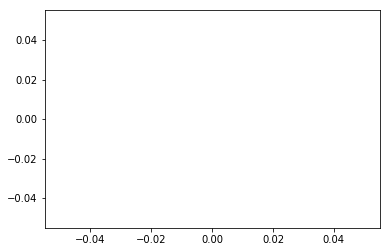

In [118]:
plt.scatter(c_lon[sub_section_down][sub_section_down], c_lat[sub_section_down][sub_section_down] ) 

In [119]:

# subsection up boundary
one = np.argwhere( c_lon[idx_up_boundary] > min_lon)
two = np.argwhere( c_lon[idx_up_boundary] < max_lon)
sub_section_up = np.intersect1d(one, two)

In [66]:
c_lon[idx_left_boundary][sub_section_left], c_lat[idx_left_boundary][sub_section_left]

(array([-15.372708, -15.376106, -15.373565, -15.377583], dtype=float32),
 array([29.687037, 29.890741, 30.060831, 30.265718], dtype=float32))

In [81]:
c_lon[idx_up_boundary]#[sub_section_up]


array([-77.83353  ,  77.83353  , -77.46072  ,  77.46072  , -77.1379   ,
        77.1379   , -76.240105 ,  76.240105 , -76.017746 ,  76.017746 ,
       -75.336716 ,  75.336716 , -75.15669  , -74.74583  ,  74.74583  ,
        75.15669  , -74.585815 ,  74.585815 , -74.07124  ,  74.07124  ,
       -73.59907  ,  73.59907  , -73.1603   ,  73.1603   , -72.74876  ,
        72.74876  , -72.097    ,  72.097    , -71.73965  ,  71.73965  ,
       -71.16411  ,  71.16411  , -70.843994 ,  70.843994 , -70.32306  ,
        70.32306  , -69.82955  ,  69.82955  , -69.359566 ,  69.359566 ,
       -68.91004  ,  68.91004  , -68.47852  ,  68.47852  , -68.06301  ,
        68.06301  , -67.5002   ,  67.5002   , -67.117035 ,  67.117035 ,
       -66.595024 ,  66.595024 , -66.09317  ,  66.09317  , -65.60932  ,
        65.60932  , -65.27644  ,  65.27644  , -64.68866  ,  64.68866  ,
       -64.249016 ,  64.249016 , -63.821617 ,  63.821617 , -63.40548  ,
        63.40548  , -62.883545 ,  62.883545 , -62.377483 ,  62.3

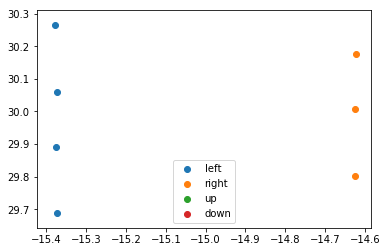

In [75]:
plt.scatter(c_lon[idx_left_boundary][sub_section_left],    c_lat[idx_left_boundary][sub_section_left], label = 'left')
plt.scatter(c_lon[idx_right_boundary][sub_section_right],  c_lat[idx_right_boundary][sub_section_right], label = 'right')
plt.scatter(c_lon[idx_up_boundary][sub_section_up],        c_lat[idx_up_boundary][sub_section_up], label = 'up')
plt.scatter(c_lon[idx_down_boundary][sub_section_down],    c_lat[idx_down_boundary][sub_section_down], label = 'down')
plt.legend()
#plt.scatter([-15.375, 14.625, -15.375, 14.625], [30.375, 30.375, 29.625, 29.625])

In [59]:
c_lat[idx_left_boundary], c_lon[idx_right_boundary]

(array([-79.08624  , -78.66924  , -78.636345 , -78.60447  , -78.57357  ,
        -78.54359  , -78.105286 , -78.07912  , -78.05358  , -78.02866  ,
        -77.63582  , -77.613335 , -77.591324 , -77.569756 , -77.20498  ,
        -77.185234 , -77.165855 , -76.81896  , -76.80112  , -76.78358  ,
        -76.46616  , -76.44974  , -76.43356  , -76.139305 , -76.12396  ,
        -76.10884  , -75.83343  , -75.818954 , -75.80468  , -75.531235 ,
        -75.517654 , -75.25821  , -75.24521  , -75.23237  , -74.98537  ,
        -74.973    , -74.72461  , -74.7128   , -74.47448  , -74.46314  ,
        -74.23378  , -74.22286  , -74.001526 , -73.99098  , -73.7769   ,
        -73.766685 , -73.5592   , -73.54928  , -73.34783  , -73.33818  ,
        -73.14228  , -73.13287  , -72.9421   , -72.93291  , -72.73791  ,
        -72.547516 , -72.5388   , -72.361435 , -72.35288  , -72.17099  ,
        -71.992874 , -71.984695 , -71.810265 , -71.63918  , -71.631325 ,
        -71.463524 , -71.29871  , -71.29114  , -71.

In [ ]:
clm_ax = sns.heatmap(cloud_mask)
clm_ax.invert_yaxis()

# index 0,0 is at the lower left corner 

In [ ]:
clm_ax = sns.heatmap(np.flipud(cloud_mask))

In [ ]:
ax = sns.heatmap(lat_array)
ax.set_xlabel('longitude i')
ax.set_ylabel('latitude j')


In [ ]:
ax2 = sns.heatmap(lon_array) # longitude is incleasing with index but latitude is deacreasing.

In [53]:
def area_grid_cell(c_lat, d_lat, d_lon):
        """
        c_lat : float
            Centre point longitude, latitude in degrees

        d_lat, d_lon : float
            delta lat lon in degrees

        Returns : area in km^2

        cdo : If the grid cell area have to be computed it is scaled with the earth radius to square meters.
        """
        R = 6371000  # in M
        # area er egentlig R**2
        area = R*(-np.sin((c_lat - d_lat)*np.pi/180)+np.sin((c_lat + d_lat)*np.pi/180) )*(2*d_lon*np.pi/180) # R**2
        return np.abs(area)


In [54]:
def compute_area_one_cell(lat = 30, lon = -15, c_lat = None, 
                          c_lon = None, d_theta = None, d_phi = None, cloud_mask_array = None):
    
    assert c_lon.shape == c_lat.shape == d_theta.shape == d_phi.shape == cloud_mask_array.shape, " c_lon.shape {},  c_lat.shape {},  d_theta.shape {}, d_phi.shape {} cloud_mask_array.shape {}".format(c_lon.shape,  c_lat.shape,  d_theta.shape, d_phi.shape, cloud_mask_array.shape) 
    
    era_AREA = area_grid_cell(lat, 0.375, 0.375)

    # Make this a loop over lat_lons?
    lat_bondaries = np.array([[lon],
                              [lat]])

    BOUND =  np.array([[-0.75/2, 0.75/2],
                       [-0.75/2, 0.75/2]])

    ranges = lat_bondaries + BOUND

    lon_range = ranges[0, :]
    lat_range = ranges[1, :]
    min_lon, max_lon = lon_range
    min_lat, max_lat = lat_range

    #d_phi   = d_phi.reshape(-1)
    #d_theta = d_theta.reshape(-1)

    era_up    = ranges[1, 1]
    era_down  = ranges[1, 0]
    era_left  = ranges[0, 0]
    era_right = ranges[0, 1]

    #c_lon = lon_array.reshape(-1) #+ d_phi
    #c_lat = lat_array.reshape(-1) #+ d_theta
    #d_phi = np.abs(d_phi)
    #d_theta = np.abs(d_theta)
    
    cmk_left  = c_lon - np.abs(d_phi)   #- era_right
    cmk_right = c_lon + np.abs(d_phi)   #- era_left

    # TODO : Sjekk d theta og lignende.
    cmk_up    = c_lat + np.abs(d_theta) #- era_down
    cmk_down  = c_lat - np.abs(d_theta) #- era_up

    idx_left_boundary  = np.intersect1d(np.argwhere(cmk_right > era_left),  np.argwhere(cmk_left < era_left) )
    idx_right_boundary = np.intersect1d(np.argwhere(cmk_right > era_right), np.argwhere(cmk_left < era_right) )
    idx_up_boundary    = np.intersect1d(np.argwhere(cmk_up > era_up), np.argwhere(cmk_down < era_up) )
    idx_down_boundary  = np.intersect1d(np.argwhere(cmk_up > era_down), np.argwhere(cmk_down < era_down) )
    
    print(len(idx_left_boundary))
    print(len(idx_right_boundary))
    print(len(idx_up_boundary))
    print(len(idx_down_boundary))
    
    lower_right_corner = np.intersect1d(idx_down_boundary, idx_right_boundary)
    lower_left_corner  = np.intersect1d(idx_down_boundary, idx_left_boundary)
    upper_left_corner  = np.intersect1d(idx_up_boundary, idx_left_boundary)
    upper_right_corner = np.intersect1d(idx_up_boundary, idx_right_boundary)

    corner_idx         = np.concatenate([lower_right_corner, lower_left_corner,
                                         upper_left_corner, upper_right_corner]) # corner idx

    if len(corner_idx) == 0:
        raise ValueError('No corners found, something is wrong ... ')
    
    max_lon, min_lon = np.max(c_lon[corner_idx]), np.min(c_lon[corner_idx])
    max_lat, min_lat = np.max(c_lat[corner_idx]), np.min(c_lat[corner_idx])

    # removes corners
    idx_down_boundary = idx_down_boundary[idx_down_boundary != lower_right_corner]
    idx_down_boundary = idx_down_boundary[idx_down_boundary != lower_left_corner]

    idx_up_boundary = idx_up_boundary[idx_up_boundary != upper_right_corner]
    idx_up_boundary = idx_up_boundary[idx_up_boundary != upper_left_corner]

    idx_left_boundary = idx_left_boundary[idx_left_boundary != upper_left_corner]
    idx_left_boundary = idx_left_boundary[idx_left_boundary != lower_left_corner]

    idx_right_boundary = idx_right_boundary[idx_right_boundary != upper_right_corner]
    idx_right_boundary = idx_right_boundary[idx_right_boundary != lower_right_corner]

    # subsection left boundary OLD
    low_bound = np.argwhere( c_lat[idx_left_boundary] > min_lat  )
    up_bound  = np.argwhere( c_lat[idx_left_boundary] < max_lat  )
    sub_section_left = np.intersect1d(low_bound, up_bound)

    # subsection right boundary
    low_bound = np.argwhere( c_lat[idx_right_boundary] > min_lat )
    up_bound  = np.argwhere( c_lat[idx_right_boundary] < max_lat)
    sub_section_right = np.intersect1d(low_bound, up_bound)

    # Subsection Down Boundary
    one = np.argwhere( c_lon[idx_down_boundary] > min_lon )
    two = np.argwhere( c_lon[idx_down_boundary] < max_lon)
    sub_section_down = np.intersect1d(one, two)

    # subsection up boundary
    one = np.argwhere( c_lon[idx_up_boundary] > min_lon)
    two = np.argwhere( c_lon[idx_up_boundary] < max_lon)
    sub_section_up = np.intersect1d(one, two)

    # test that these are empty
    t1 = np.intersect1d(idx_down_boundary, idx_up_boundary)
    t2 = np.intersect1d(idx_right_boundary, idx_left_boundary)
    print( len(t1))
    print(len(t2) )
    #assert len(t1) == len(t2) == 0

    # Calculate Boundaries

    # AREA left boundary
    dlon_lf = ( era_left - (c_lon[idx_left_boundary][sub_section_left] +
                             d_phi[idx_left_boundary][sub_section_left]))/2 # negative values

    dlat_lf = d_theta[idx_left_boundary][sub_section_left]

    lat_lf = c_lat[idx_left_boundary][sub_section_left]
    lon_lf = c_lon[idx_left_boundary][sub_section_left]

    a = np.sum(area_grid_cell(lat_lf, dlat_lf, np.abs(dlon_lf)))

    fraction_left = (cloud_mask_array[idx_left_boundary][sub_section_left]*area_grid_cell(lat_lf,
                                                                                          dlat_lf,
                                                                                          dlon_lf)/era_AREA).sum()
    # AREA right boundary
    dlon_rb = (c_lon[idx_right_boundary][sub_section_right] - d_phi[idx_right_boundary][sub_section_right] -
               era_right)/2

    dlat_rb = d_theta[idx_right_boundary][sub_section_right]

    lat_rb = c_lat[idx_right_boundary][sub_section_right]
    lon_rb = c_lon[idx_right_boundary][sub_section_right]

    b = np.sum(area_grid_cell(lat_rb, dlat_rb, np.abs(dlon_rb)))

    fraction_right = (cloud_mask_array[idx_right_boundary][sub_section_right]*area_grid_cell(lat_rb,
                                                                                          dlat_rb,
                                                                                          dlon_rb)/era_AREA).sum()

    # AREA down boundary
    dlat_down = (era_down - c_lat[idx_down_boundary][sub_section_down] +
                  d_theta[idx_down_boundary][sub_section_down])/2

    lat_down = era_down + dlat_down

    dlon_down = d_phi[idx_down_boundary][sub_section_down]
    lon_down =  c_lon[idx_down_boundary][sub_section_down]

    c = np.sum(area_grid_cell(lat_down, dlat_down, dlon_down))

    fraction_down = (cloud_mask_array[idx_down_boundary][sub_section_down]*area_grid_cell(lat_down,
                                                                                          dlat_down,
                                                                                          dlon_down)/era_AREA).sum()
    # AREA up
    # AREA up boundary
    dlat_up = (era_up - (c_lat[idx_up_boundary][sub_section_up] -
                         d_theta[idx_up_boundary][sub_section_up]) )/2

    lat_up = era_up - dlat_up
    lon_up = c_lon[idx_up_boundary][sub_section_up]
    dlon_up = d_phi[idx_up_boundary][sub_section_up]

    d = np.sum(area_grid_cell(lat_up, dlat_up, np.abs(dlon_up)))

    fraction_up = (cloud_mask_array[idx_up_boundary][sub_section_up]*area_grid_cell(lat_up,
                                                                 dlat_up,
                                                                 dlon_up)/era_AREA).sum()


    # Index centres.
    idx_centre_one = np.intersect1d(np.argwhere(cmk_left  > era_left),
                                    np.argwhere(cmk_right < era_right))


    idx_centre_two = np.intersect1d(np.argwhere(cmk_up   < era_up),
                                    np.argwhere(cmk_down >  era_down))

    idx_centre_cells = np.intersect1d( idx_centre_one, idx_centre_two )
    lat_centre_cells = c_lat[idx_centre_cells]
    dlat_centre = d_theta[idx_centre_cells]
    dlon_centre = d_phi[idx_centre_cells]
    fraction_centre = (cloud_mask_array[idx_centre_cells]*area_grid_cell(lat_centre_cells,
                                                                 dlat_centre,
                                                                 dlon_centre)/era_AREA).sum()
    print("era_AREA {}".format(era_AREA))
    print("Sum up {}".format(area_grid_cell(lat_up, dlat_up, dlon_up).sum()/era_AREA))
    print("Sum down {}".format(area_grid_cell(lat_down, dlat_down, dlon_down).sum()/era_AREA))
    print("Sum centre {}".format(area_grid_cell(lat_centre_cells, dlat_centre, dlon_centre).sum() /era_AREA))
    print("Sum left {}".format(area_grid_cell(lat_lf, dlat_lf, dlon_lf).sum()/era_AREA))
    print("Sum right {}".format(area_grid_cell(lat_rb, dlat_rb, dlon_rb).sum()/era_AREA))
    
    Test_weight = (area_grid_cell(lat_up, dlat_up, dlon_up).sum() +
                   area_grid_cell(lat_centre_cells, dlat_centre, dlon_centre).sum() +
                   area_grid_cell(lat_down, dlat_down, dlon_down).sum() +
                   area_grid_cell(lat_rb, dlat_rb, dlon_rb).sum() +
                  area_grid_cell(lat_lf, dlat_lf, dlon_lf).sum() ) /era_AREA
    
    print("SUM weight {}".format(Test_weight))
    return


In [ ]:
compute_area_one_cell(lat = 30, lon = -15, c_lat = lat_array.reshape(-1), 
                      c_lon = lon_array.reshape(-1), d_theta = d_theta.reshape(-1), 
                      d_phi = d_phi.reshape(-1), cloud_mask_array = cloud_mask.reshape(-1))

In [ ]:
area_grid_cell(lat_up, dlat_up, dlon_up).sum()

In [ ]:
area_grid_cell(lat_centre_cells, dlat_centre, dlon_centre).sum() +
                   area_grid_cell(lat_down, dlat_down, dlon_down).sum() +
                   area_grid_cell(lat_rb, dlat_rb, dlon_rb).sum() +
                  area_grid_cell(lat_lf, dlat_lf, dlon_lf).sum() ) /era_AREA

In [ ]:
lat_array

In [ ]:
sns.heatmap(d_phi)

In [ ]:
sns.heatmap(d_theta)

In [ ]:
coord_info = pd.read_csv('~/Desktop/lat_lon_dlat_dlon.csv')
c_lat = coord_info.lat.values
c_lon = coord_info.lon.values
d_phi_new = coord_info.dlon.values
d_theta_new = coord_info.dlat.values

In [ ]:
d_theta_new.shape

In [ ]:
np.sqrt(10375000)

In [ ]:
sns.heatmap(d_phi.reshape((3712,3712)) )

In [ ]:
sns.heatmap(d_theta.reshape((3712,3712)) )

In [ ]:
#plt.scatter(c_lat.)

In [ ]:
#c_lon[c_lon < -99] = np.nan
#c_lat[c_lat < -99] = np.nan

In [ ]:
#sns.kdeplot(c_lon, c_lat)

In [ ]:
#sns.heatmap(d_phi.reshape((3712, 3712)))

In [ ]:
#sns.heatmap(d_theta.reshape((3712, 3712)))